In [1]:
import matplotlib.pyplot as plt

# Clustering Colors from an Image

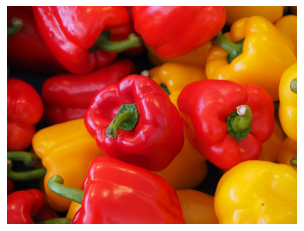

In [20]:
# load image
img = plt.imread('peppers.jpg')
#img = plt.imread('rose2.jfif')
plt.imshow(img) #show image
plt.axis('off');


The image above has 480 pixels in height and 640 pixels in width.  Each pixel has 3 values that represent how much red, green and blue it has. Below you can play with different combinations of RGB to create different colors. In total, you can create $256^3 = 16,777,216$ unique colors.

img_flat = img.reshape(img.shape[0]*img.shape[1],3)
print(img_flat.shape)
img_flat[:5,:]
img_flat.shape

In [21]:
# Question1 Apply k-means Algorithm
img_flat = img.reshape(img.shape[0]*img.shape[1],3)
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5)
model.fit(img_flat)

KMeans(n_clusters=5)

In [23]:
print(model.cluster_centers_)
print(len(model.labels_))


[[219.72934584 127.25295456 131.97697387]
 [214.83851082  29.58174205  25.4948914 ]
 [229.55405022 159.46508432   6.75261027]
 [ 50.3406552   22.24110299   8.25720009]
 [145.60285768  35.9190128    6.83123896]]
307200


In [24]:
#Question 2
# loops for each cluster center
#replace kmeans.labels_ with kmeans.cluster_centers_[i]
model_labels_ = []
for i in range(len(model.labels_)):
    if model.labels_[i]==0:
        model_labels_.append(model.cluster_centers_[0].tolist())
    if model.labels_[i]==1:
        model_labels_.append(model.cluster_centers_[1].tolist())
    if model.labels_[i]==2:
        model_labels_.append(model.cluster_centers_[2].tolist())
    if model.labels_[i]==3:
        model_labels_.append(model.cluster_centers_[3].tolist())
    if model.labels_[i]==4:
        model_labels_.append(model.cluster_centers_[4].tolist())


#Question 3 Apply elbow method

In [17]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(img_flat)
    distortions.append(kmeanModel.inertia_)

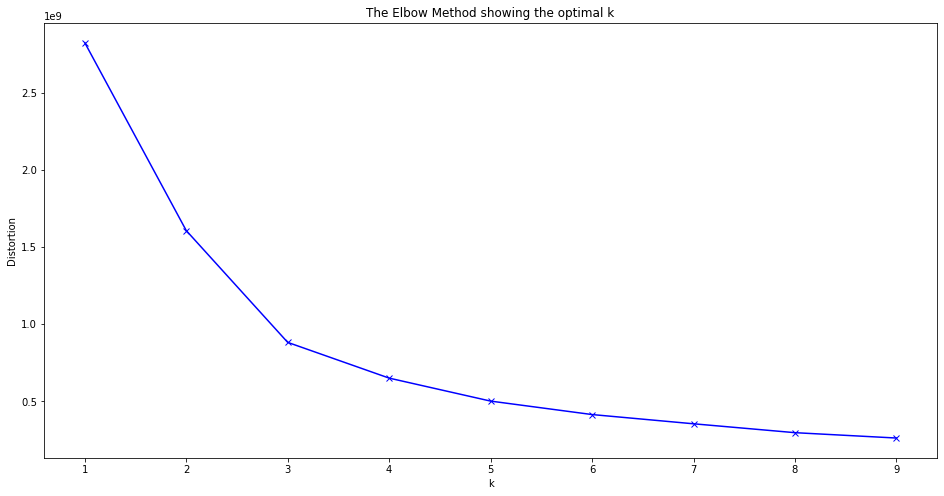

In [18]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [29]:
ll=np.array(model_labels_)

new_img=ll.reshape([480,640,3])

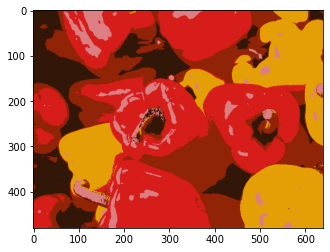

In [32]:
plt.imshow(new_img.astype(np.uint8))